<a href="https://colab.research.google.com/github/Navyasrimachagiri/Fertilizer_prediction/blob/main/fertilizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Fertilizer_prediction.csv")

In [4]:
print(df.describe())

          Nitrogen   Phosphorus    Potassium           pH     Rainfall  \
count  4513.000000  4513.000000  4513.000000  4513.000000  4513.000000   
mean     95.409927    54.341901    63.595170     6.715267   819.189010   
std      38.060648    16.551991    35.691911     0.625198   251.730813   
min      20.000000    10.000000     5.000000     5.500000   300.000000   
25%      60.000000    40.000000    40.000000     6.000000   600.000000   
50%     105.000000    55.000000    55.000000     6.500000   800.000000   
75%     125.000000    65.000000    75.000000     7.000000  1000.000000   
max     150.000000    90.000000   150.000000     8.500000  1700.000000   

       Temperature  
count  4513.000000  
mean     25.915134  
std       5.897328  
min      10.000000  
25%      20.000000  
50%      25.000000  
75%      30.000000  
max      40.000000  


In [5]:
print(len(df))

4513


In [6]:
print(df.shape[0])

4513


In [7]:
#Checking outliers
from scipy.stats import zscore
any_outliers = (abs(df.select_dtypes(include=['number']).apply(zscore))).any().any()

In [8]:
print(any_outliers)

True


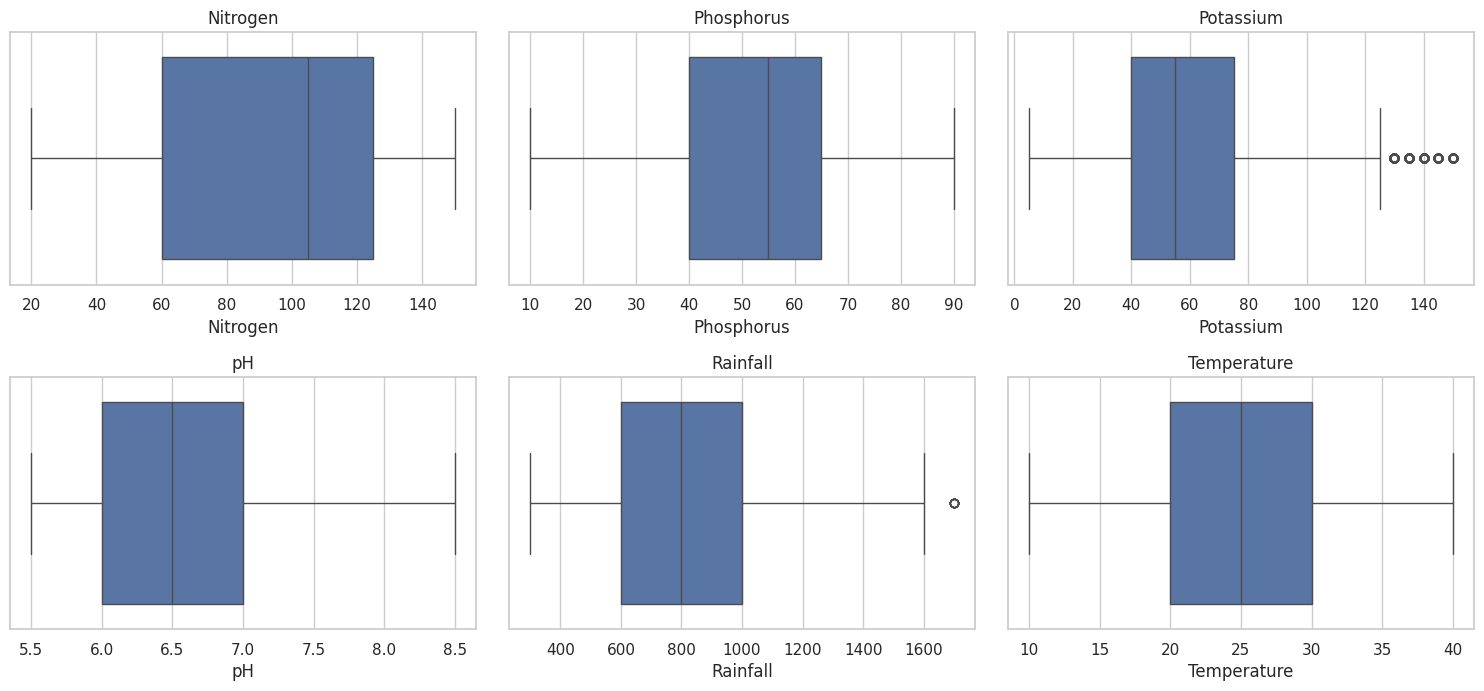

In [9]:
#Showing outlier in BoxPlot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [10]:
Q1=df['Nitrogen'].quantile(0.25)
Q3=df['Nitrogen'].quantile(0.75)
IQR=Q3-Q1

In [11]:
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

In [12]:
df_no=df[(df['Nitrogen']>=lb)&(df['Nitrogen']<=ub)]

In [13]:
print(df_no)

     Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature  \
0         Black        75          50        100  6.5      1000           20   
1         Black        80          50        100  6.5      1000           20   
2         Black        85          50        100  6.5      1000           20   
3         Black        90          50        100  6.5      1000           20   
4         Black        95          50        100  6.5      1000           20   
...         ...       ...         ...        ...  ...       ...          ...   
4508      Black       130          80        150  7.0      1400           30   
4509      Black       135          80        150  7.0      1400           30   
4510      Black       140          80        150  7.0      1400           30   
4511      Black       145          80        150  7.0      1400           30   
4512      Black       150          80        150  7.0      1400           30   

     Fertilizer  
0          Urea  
1  

In [14]:
#Handling outliers
def handle_outliers(df):
    df_no_outliers = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

    return df_no_outliers


In [15]:
df_no_outliers = handle_outliers(df)

In [16]:
print(df_no_outliers)

     Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature  \
0         Black        75          50        100  6.5      1000           20   
1         Black        80          50        100  6.5      1000           20   
2         Black        85          50        100  6.5      1000           20   
3         Black        90          50        100  6.5      1000           20   
4         Black        95          50        100  6.5      1000           20   
...         ...       ...         ...        ...  ...       ...          ...   
4473      Black       130          80        125  7.5      1500           25   
4474      Black       135          80        125  7.5      1500           25   
4475      Black       140          80        125  7.5      1500           25   
4476      Black       145          80        125  7.5      1500           25   
4477      Black       150          80        125  7.5      1500           25   

     Fertilizer  
0          Urea  
1  

In [17]:
print(len(df_no_outliers))

4009


In [18]:
missing_val=df.isnull().sum()

In [ ]:
print(missing_val)

Soil_color     0
Nitrogen       0
Phosphorus     0
Potassium      0
pH             0
Rainfall       0
Temperature    0
Fertilizer     0
dtype: int64


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
print(df['Fertilizer'].unique())

['Urea' 'DAP' 'MOP' '10:26:26 NPK' 'SSP' 'Magnesium Sulphate'
 '13:32:26 NPK' '12:32:16 NPK' '50:26:26 NPK' '19:19:19 NPK'
 'Chilated Micronutrient' '18:46:00 NPK' 'Sulphur' '20:20:20 NPK'
 'Ammonium Sulphate' 'Ferrous Sulphate' 'White Potash' '10:10:10 NPK'
 'Hydrated Lime']


<ipython-input-21-0697ecaed1bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fertilizer',data=df,palette="plasma_r")


<Axes: xlabel='count', ylabel='Fertilizer'>

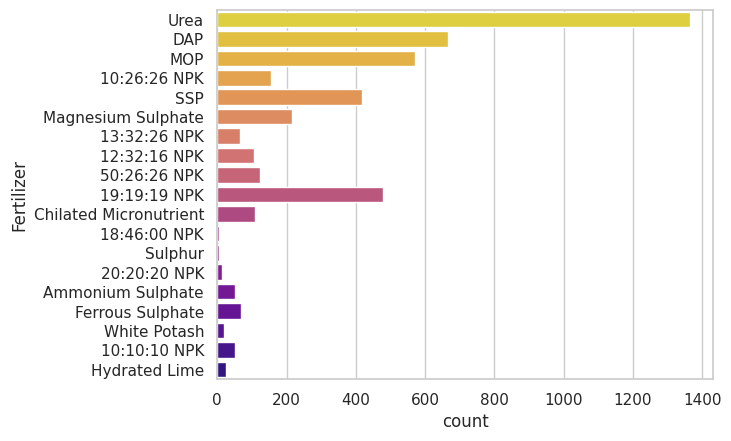

In [21]:
sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

In [22]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

<ipython-input-22-eb4a2ac0a237>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,ax=axes[0])


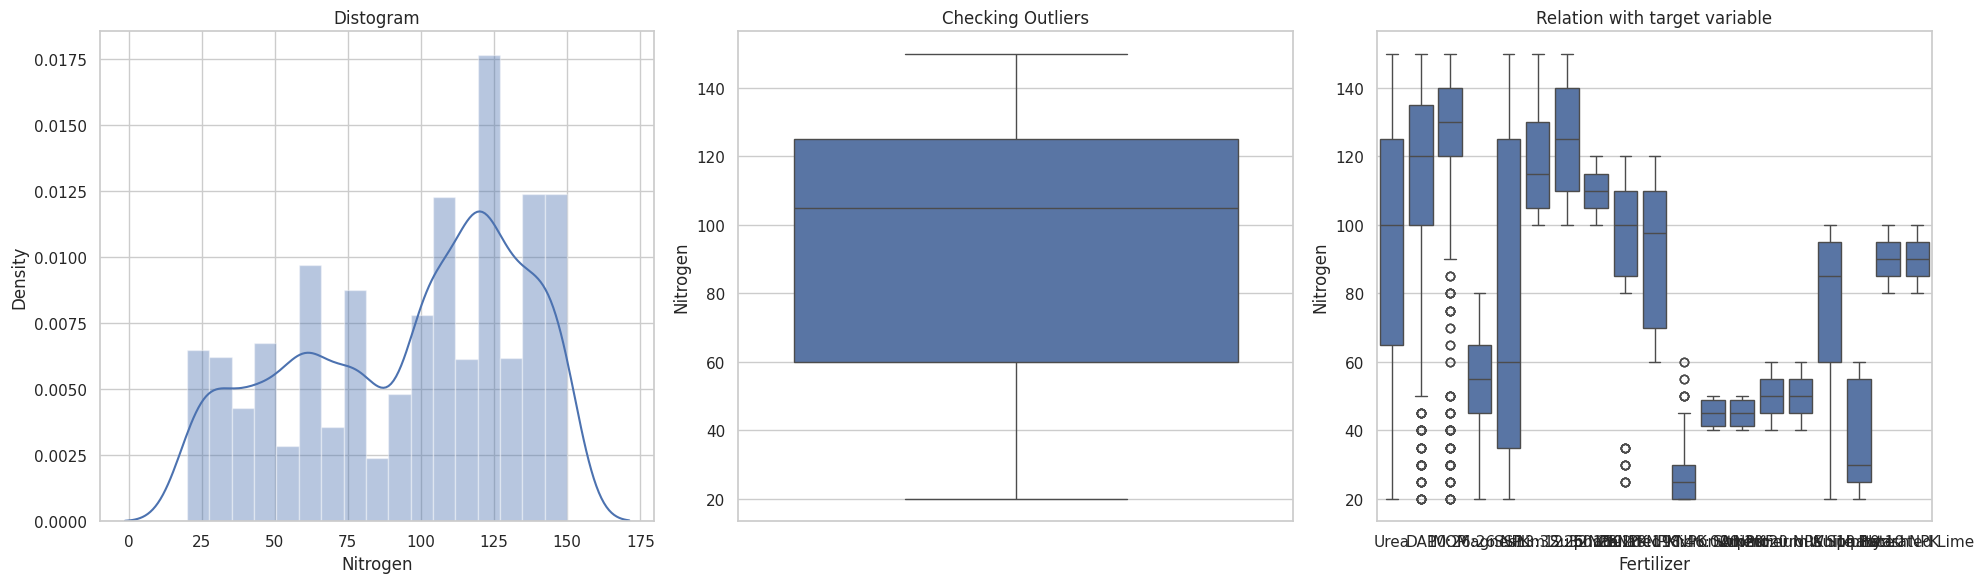

In [23]:
plot_conti(df['Nitrogen'])